In [165]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage import io, color

img=io.imread('/content/drive/MyDrive/Colab Notebooks/Convolutional ANN/gatito.jpg')

In [ ]:
img.shape

(450, 800, 3)

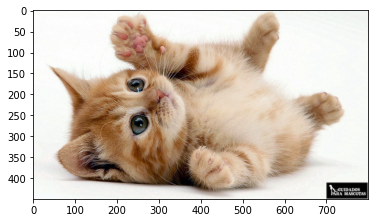

In [ ]:
plt.pyplot.imshow(img)

In [ ]:
b=img[:,:,0]
g=img[:,:,1]
r=img[:,:,2]

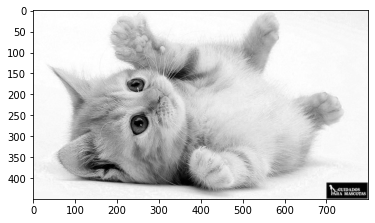

In [ ]:
plt.pyplot.imshow(b,cmap='gray')

In [ ]:
r.shape

(450, 800)

In [ ]:
aux_dim=np.zeros((450,800))
aux_dim.shape

(450, 800)

In [ ]:
#dstack es stakear las dimenciones
#creamos una array con los tres colores,
#y si le metemos data solo a la columna r o g o b cambiamos el colot
red=np.dstack((r,aux_dim,aux_dim)).astype(np.uint8)

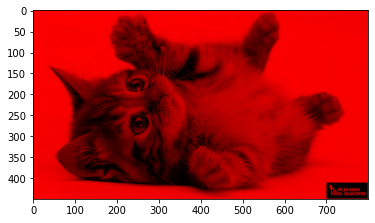

In [ ]:
plt.pyplot.imshow(red)

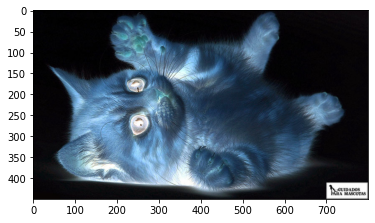

In [ ]:
img_neg_pos=255-img #color max - valor img da imagen negativa

plt.pyplot.imshow(img_neg_pos)

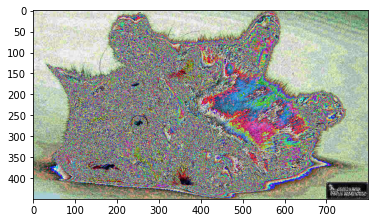

In [ ]:
#Lab

img_neg_pos=img*10

plt.pyplot.imshow(img_neg_pos)

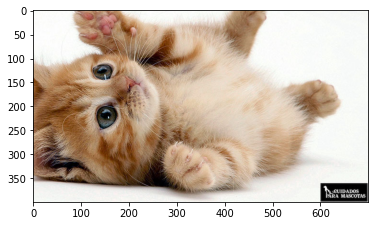

In [ ]:
plt.pyplot.imshow(img[50:,100:]) #moviendo la matriz haces zoom

# CONVOLUTIONAL KERNEL

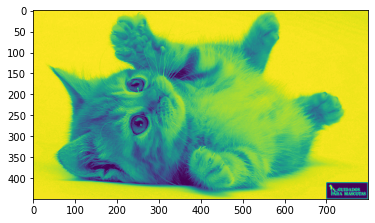

In [166]:
#dejamos solo una capa de color
img_gray=color.rgb2gray(img)
plt.imshow(img_gray)

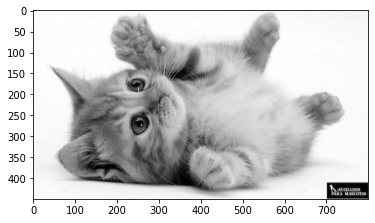

In [ ]:
kernel = np.array(([0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1]))

#aplicamos el kernel y convolucionamos la imagen
img_conv=nd.convolve(img_gray,kernel)
plt.imshow(img_conv,cmap='gray')

0.0    6.8274509803921575


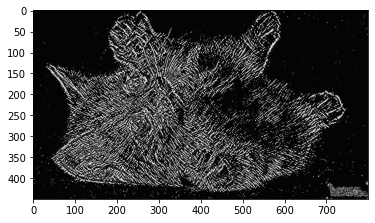

In [180]:
#EJERCICIO POL

#dejamos solo una capa de color
img_gray=color.rgb2gray(img)

kernel = np.array(([ 1, 0,  -1],
                   [ 1, 0 ,  -1],
                   [1, 0  , -1]))

#aplicamos el kernel y convolucionamos la imagen
img_conv=nd.convolve(img_gray,kernel)


img_conv=nd.convolve(img_conv,kernel.T)


for x in range(len(img_conv)):
    for y in range(len(img_conv[x])):
        pixel = img_conv[x][y]
        pixel_neg = 1.0 - img_conv[x][y]
        
        if pixel_neg  < 0.6:
            pixel_neg = 0
        
        if pixel < 0.6:
            pixel = 0
        
        img_conv[x][y] = pixel + pixel_neg

print(img_conv.min(),'  ',img_conv.max())

img_conv[img_conv<0.9]=6        


plt.imshow(img_conv,cmap='gray')

#DATA AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
datagen=ImageDataGenerator(rotation_range=40,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest',
                   brightness_range=[0.4,1.5]
                   )

In [ ]:
x=img_to_array(img)
print(x.shape)
x=x.reshape((1,)+x.shape)
print(x.shape)

(450, 800, 3)
(1, 450, 800, 3)


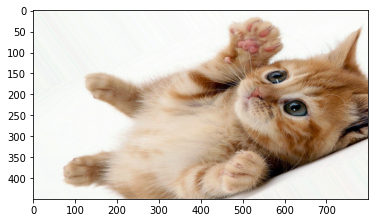

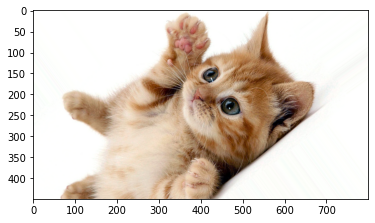

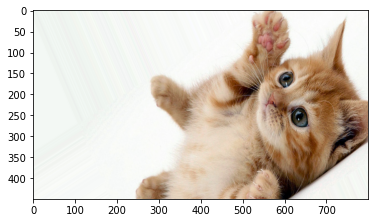

In [ ]:
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i+=1
    if i % 3== 0:
      break

In [ ]:
#cargar de una carpeta
train_generator = datagen.flow_from_directory(
'./ruta',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)